<a href="https://colab.research.google.com/github/Elman295/spoken-digit-classification/blob/main/audio__Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`Spoken Digit classification`

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.core.display import display
%matplotlib inline

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_train,y_train = tfds.load("spoken_digit", split = "train[:80%]", batch_size = -1, as_supervised = True)
x_test, y_test = tfds.load("spoken_digit", split = "train[80%:85%]", batch_size = -1, as_supervised = True)
x_val, y_val = tfds.load("spoken_digit", split = "train[85%:]", batch_size = -1, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/spoken_digit/1.0.9.incompleteEZV5QD/spoken_digit-train.tfrecord*...:   0%|    …

Dataset spoken_digit downloaded and prepared to ~/tensorflow_datasets/spoken_digit/1.0.9. Subsequent calls will reuse this data.


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(2000, 8281)
(2000,)
(125, 18262)
(125,)
(375, 6370)
(375,)


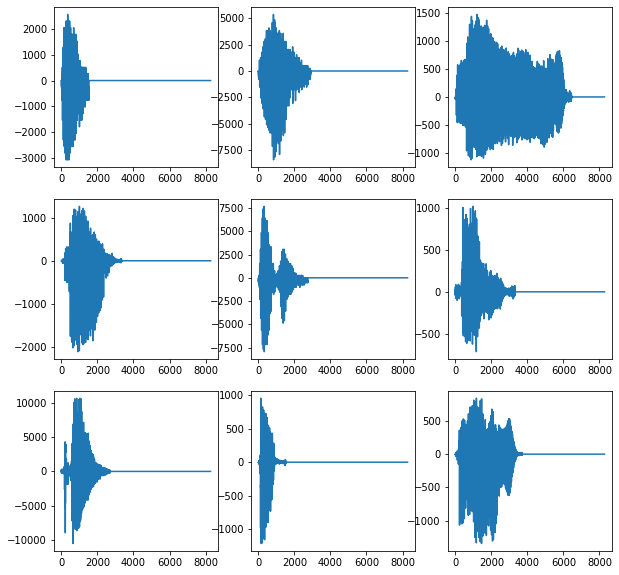

In [ ]:
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.plot(x_train[i])
plt.show()

In [ ]:
def get_spectrogram(audio):
  audio = tf.cast(audio, tf.float32)
  spectrogram = tf.signal.stft(
      signals = audio,
      frame_length = 255,
      frame_step = 128
  )
  spectrogram = tf.abs(spectrogram)
  spectrogram = spectrogram[...,tf.newaxis]
  return spectrogram

In [ ]:
for i in range(9):
  print(x_train[i].shape)
  spectrogram = get_spectrogram(x_train[i])
  print(spectrogram.shape)
  display(Audio(x_train[i], rate = 8000))
  print("--------------------------------------------------")

(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------
(8281,)
(63, 129, 1)


--------------------------------------------------


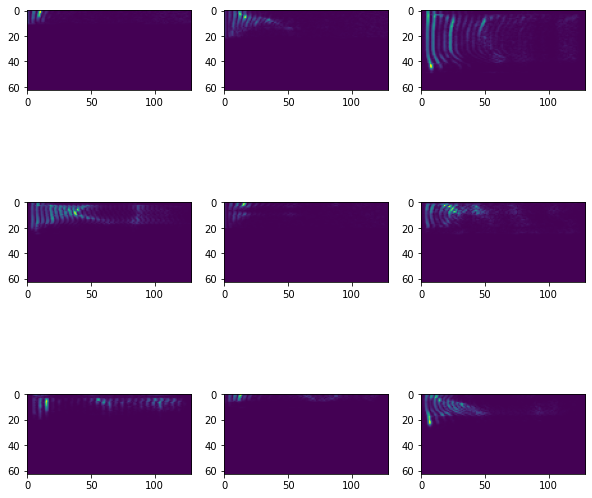

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  spectrogram = get_spectrogram(x_train[i])
  plt.imshow(spectrogram.numpy().reshape(63,129))

plt.show()


In [ ]:
def make_spec (x,y):
  s = get_spectrogram(x)
  return s,y


In [ ]:
x_train_spec, y_train_spec = make_spec(x_train, y_train)
x_test_spec, y_test_spec = make_spec(x_test, y_test)
x_val_spec, y_val_spec = make_spec(x_val, y_val)

In [ ]:
print(x_train_spec.shape)
print(x_test_spec.shape)

(2000, 63, 129, 1)
(125, 141, 129, 1)


In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Resizing(60,60),
    tf.keras.layers.Conv2D(16,(3,3),padding = "same",activation = "relu"),
    # tf.keras.layers.Conv2D(16,(3,3), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(),
   

    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    # tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = "relu"),
    tf.keras.layers.Dense(units = 10, activation = "softmax")


])

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(x_train_spec, y_train_spec, epochs = 10, validation_data=(x_val_spec, y_val_spec))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 11s 154ms/step - loss: 991.1988 - accuracy: 0.4995 - val_loss: 94.8446 - val_accuracy: 0.5893
Epoch 2/10
63/63 [==============================] - 9s 147ms/step - loss: 65.5004 - accuracy: 0.6355 - val_loss: 48.8853 - val_accuracy: 0.6400
Epoch 3/10
63/63 [==============================] - 7s 117ms/step - loss: 29.7413 - accuracy: 0.7290 - val_loss: 42.0896 - val_accuracy: 0.6613
Epoch 4/10
63/63 [==============================] - 7s 116ms/step - loss: 18.7169 - accuracy: 0.7710 - val_loss: 40.5224 - val_accuracy: 0.6427
Epoch 5/10
63/63 [==============================] - 9s 139ms/step - loss: 17.6176 - accuracy: 0.7995 - val_loss: 38.4481 - val_accuracy: 0.6667
Epoch 6/10
63/63 [==============================] - 7s 118ms/step - loss: 12.5850 - accuracy: 0.8305 - val_loss: 27.5083 - val_accuracy: 0.6853
Epoch 7/10
63/63 [==============================] - 7s 115ms/step - loss: 9.4798 - accuracy: 0.8585 - val_loss: 36.5581 - val_accuracy: 0.7387
Ep

In [ ]:


history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

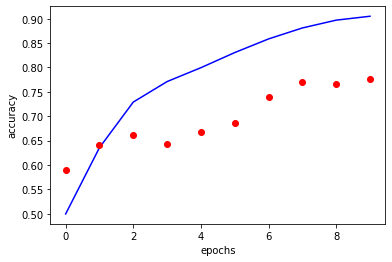

In [ ]:
plt.plot(history.history["accuracy"], color = "blue")
plt.plot(history.history["val_accuracy"],"ro")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

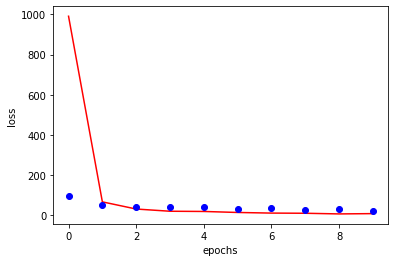

In [ ]:
plt.plot(history.history["loss"], color = "red")
plt.plot(history.history["val_loss"], "bo")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
model.evaluate(x_test_spec, y_test_spec)

4/4 [==============================] - 0s 30ms/step - loss: 128.0210 - accuracy: 0.4000


[128.02096557617188, 0.4000000059604645]